In [54]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('churn_clean.csv')
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [3]:
df.shape

(10000, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
df.duplicated().sum()

0

In [6]:
df['Zip'] = df['Zip'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  object 
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64


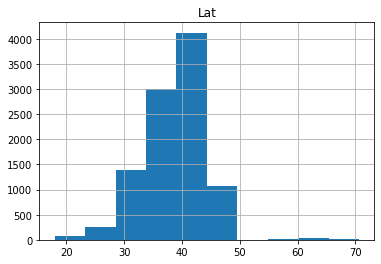

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64


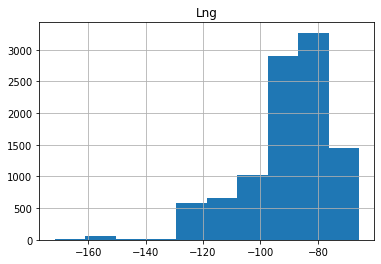

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


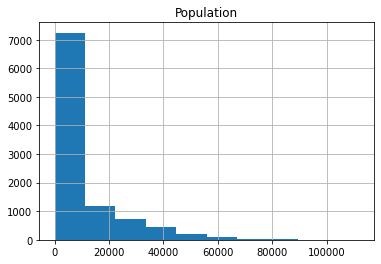

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64


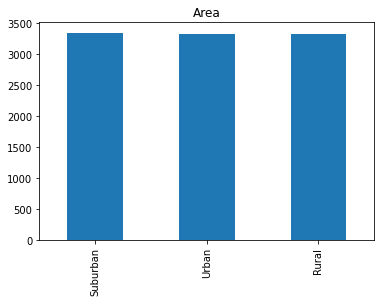

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: TimeZone, dtype: in

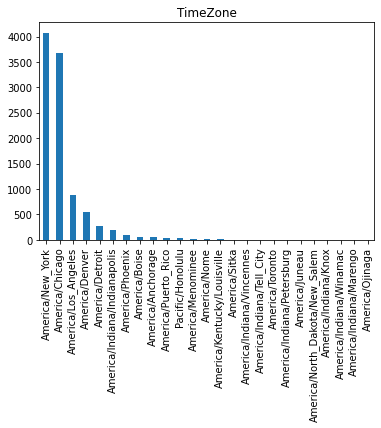

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64


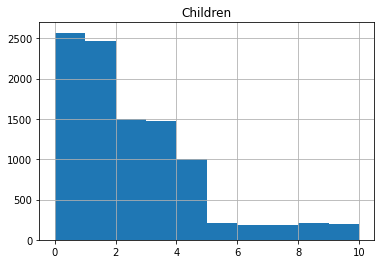

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


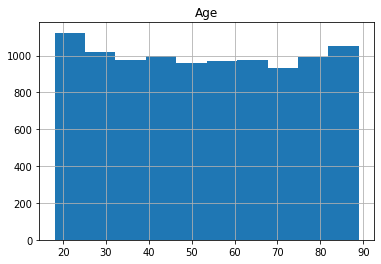

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


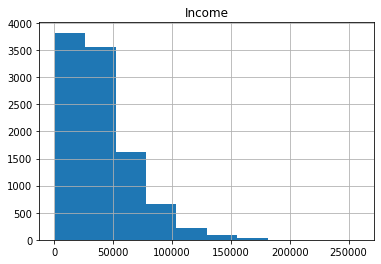

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64


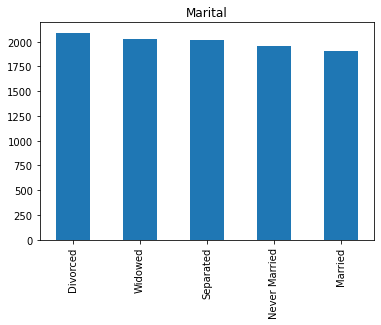

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64


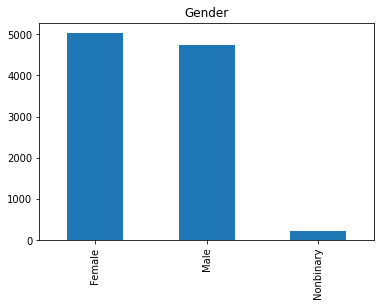

No     7350
Yes    2650
Name: Churn, dtype: int64


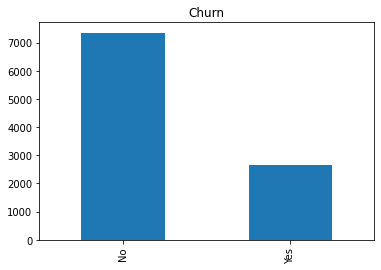

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64


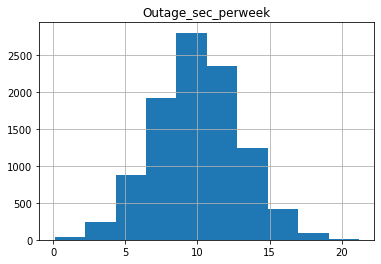

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64


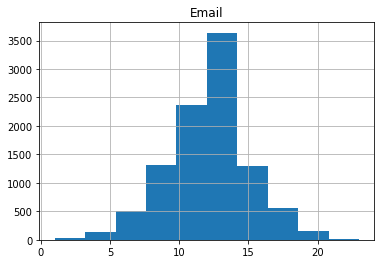

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64


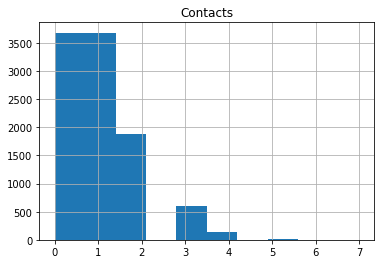

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64


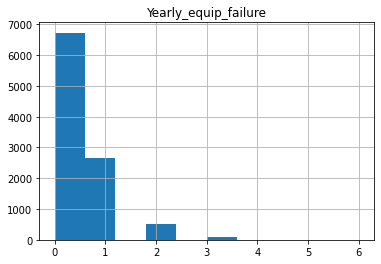

No     8321
Yes    1679
Name: Techie, dtype: int64


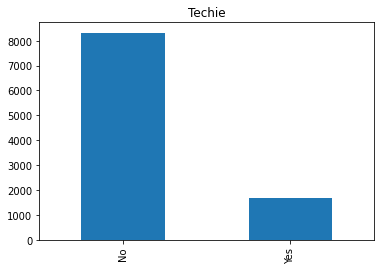

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64


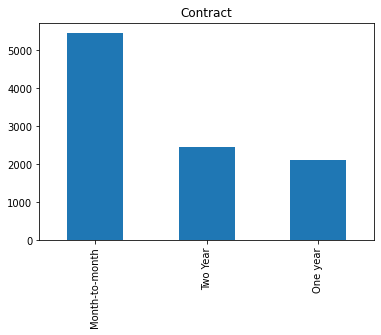

No     5166
Yes    4834
Name: Port_modem, dtype: int64


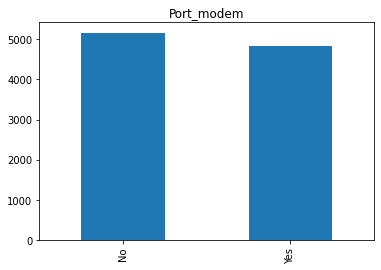

No     7009
Yes    2991
Name: Tablet, dtype: int64


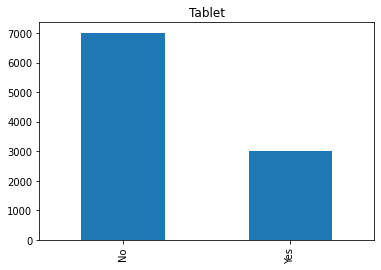

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64


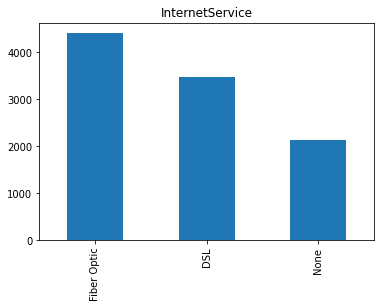

Yes    9067
No      933
Name: Phone, dtype: int64


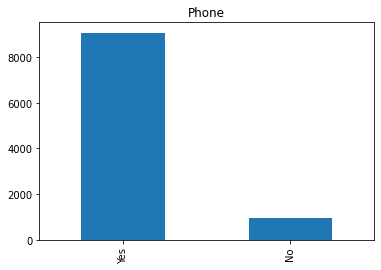

No     5392
Yes    4608
Name: Multiple, dtype: int64


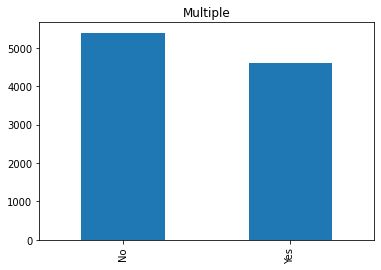

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64


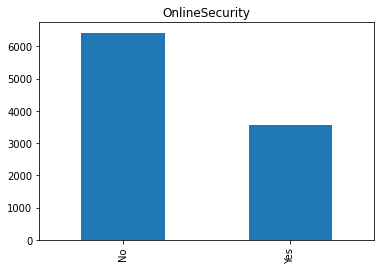

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64


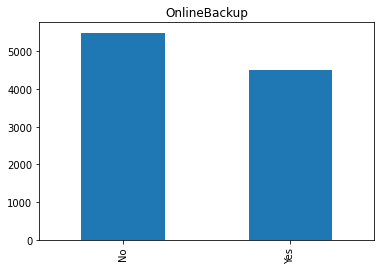

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64


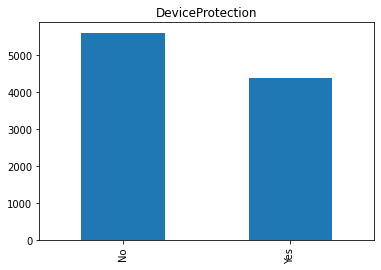

No     6250
Yes    3750
Name: TechSupport, dtype: int64


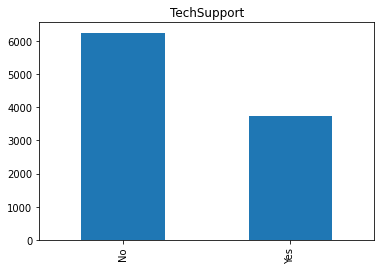

No     5071
Yes    4929
Name: StreamingTV, dtype: int64


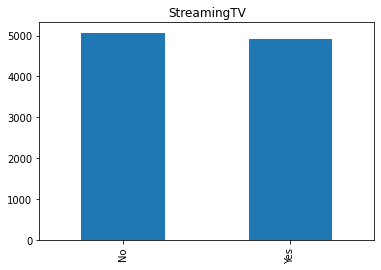

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64


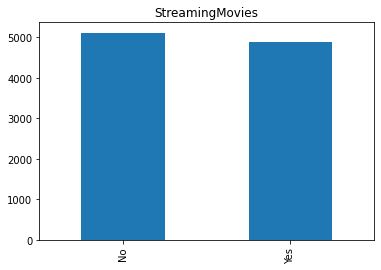

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64


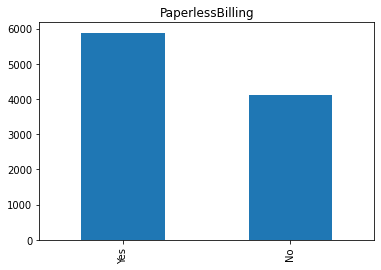

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64


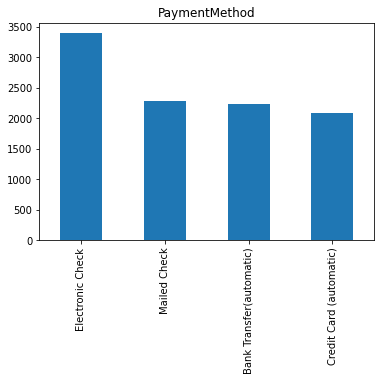

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


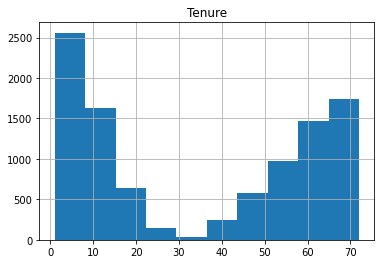

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


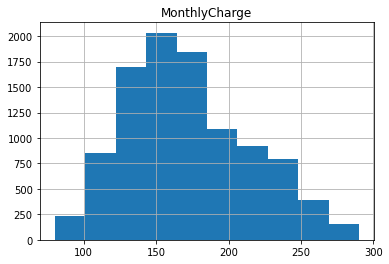

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64


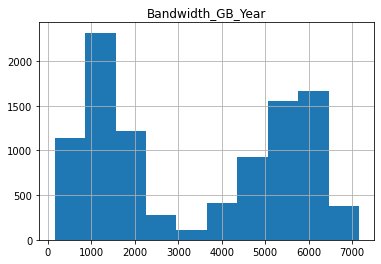

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item1, dtype: float64


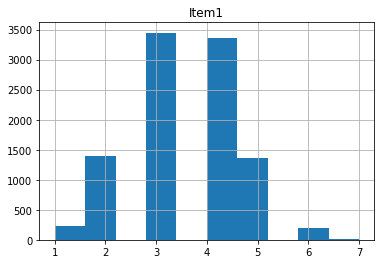

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64


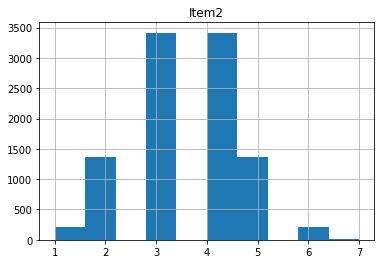

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item3, dtype: float64


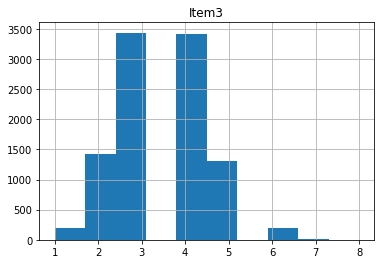

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item4, dtype: float64


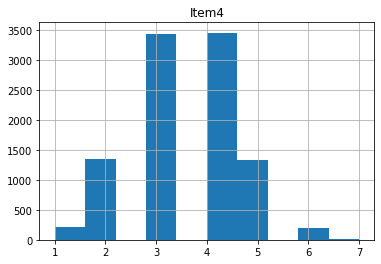

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item5, dtype: float64


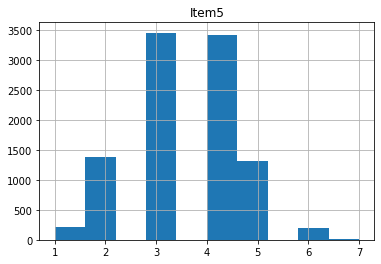

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item6, dtype: float64


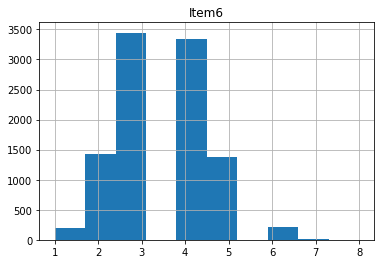

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item7, dtype: float64


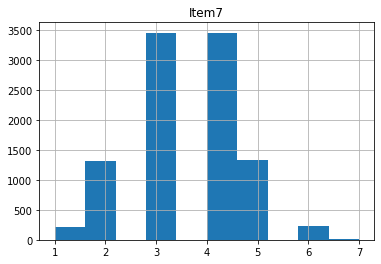

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item8, dtype: float64


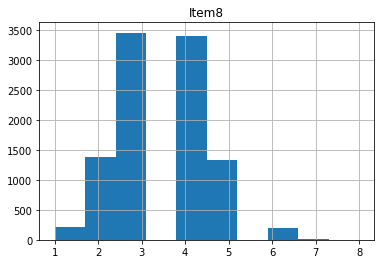

In [8]:
for col in df.columns[8:]:
    if df[col].dtype == 'object' and col != 'Job':
        plt.subplot()
        print(df[col].value_counts())
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.subplot()
        print(df[col].describe())
        df[col].hist()
        plt.title(col)
        plt.show()

    
        

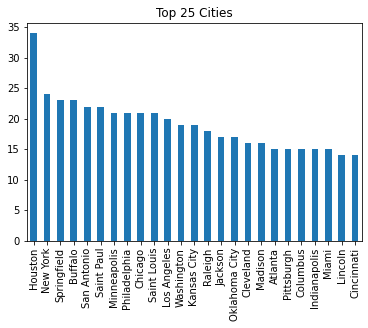

In [9]:
df['City'].value_counts()[:25].plot(kind='bar')
plt.title('Top 25 Cities')
plt.show()

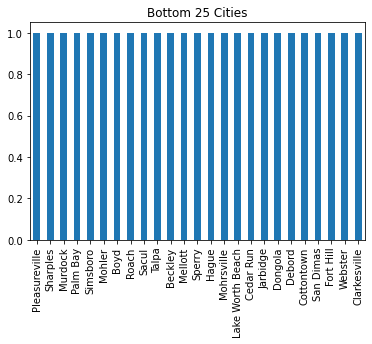

In [10]:
df['City'].value_counts()[-25:].plot(kind='bar')
plt.title('Bottom 25 Cities')
plt.show()

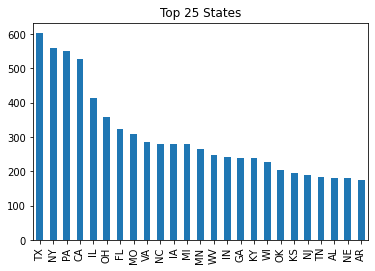

In [11]:
df['State'].value_counts()[:25].plot(kind='bar')
plt.title('Top 25 States')
plt.show()

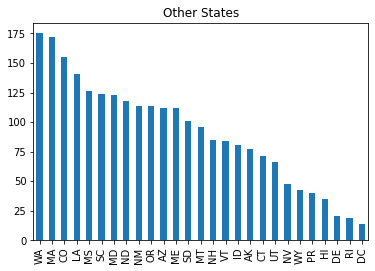

In [12]:
df['State'].value_counts()[25:].plot(kind='bar')
plt.title('Other States')
plt.show()

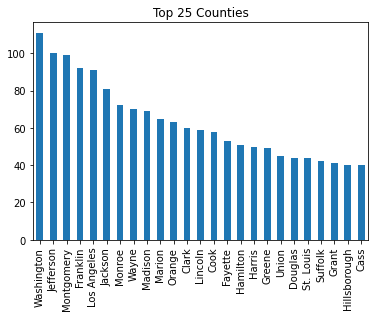

In [13]:
df['County'].value_counts()[:25].plot(kind='bar')
plt.title('Top 25 Counties')
plt.show()

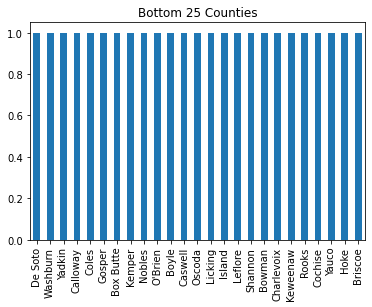

In [14]:
df['County'].value_counts()[-25:].plot(kind='bar')
plt.title('Bottom 25 Counties')
plt.show()

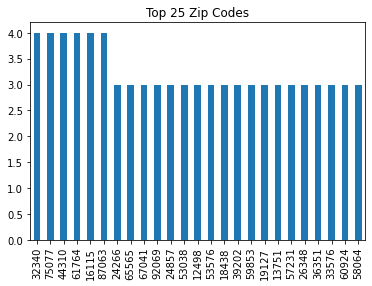

In [15]:
df['Zip'].value_counts()[:25].plot(kind='bar')
plt.title('Top 25 Zip Codes')
plt.show()

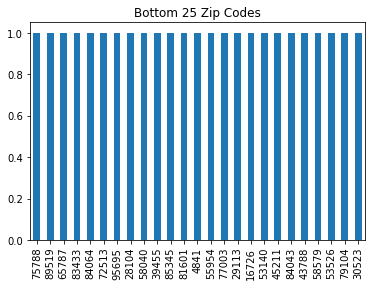

In [16]:
df['Zip'].value_counts()[-25:].plot(kind='bar')
plt.title('Bottom 25 Zip Codes')
plt.show()

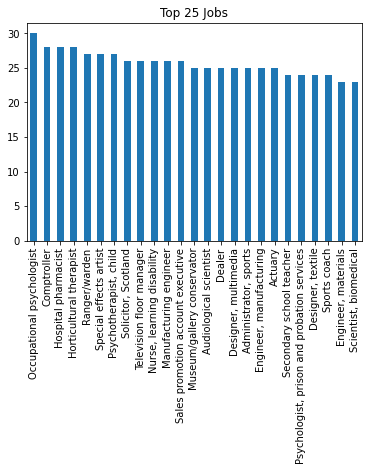

In [17]:
df['Job'].value_counts()[:25].plot(kind='bar')
plt.title('Top 25 Jobs')
plt.show()

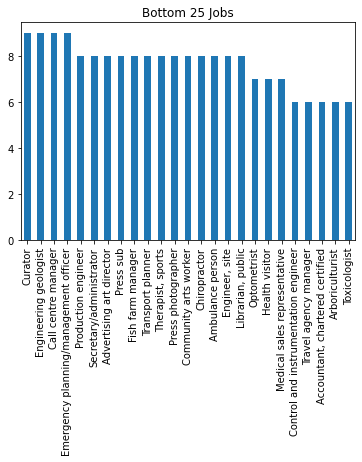

In [18]:
df['Job'].value_counts()[-25:].plot(kind='bar')
plt.title('Bottom 25 Jobs')
plt.show()

In [19]:
numeric_cols = [col for col in df.columns[4:] if df[col].dtype in ['int64', 'float64']]
print(numeric_cols)
print(len(numeric_cols))

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
21


In [20]:
categorical_cols = [col for col in df.columns[4:] if col not in numeric_cols]
print(categorical_cols)
print(len(categorical_cols))

['City', 'State', 'County', 'Zip', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
25


In [21]:
for col in numeric_cols:
    print(col, stats.shapiro(df[col]))

Lat ShapiroResult(statistic=0.9601455926895142, pvalue=1.401298464324817e-45)
Lng ShapiroResult(statistic=0.9020202159881592, pvalue=0.0)
Population ShapiroResult(statistic=0.6966826915740967, pvalue=0.0)
Children ShapiroResult(statistic=0.836870014667511, pvalue=0.0)
Age ShapiroResult(statistic=0.9543271064758301, pvalue=0.0)
Income ShapiroResult(statistic=0.8934258222579956, pvalue=0.0)
Outage_sec_perweek ShapiroResult(statistic=0.9997866749763489, pvalue=0.4358324408531189)
Email ShapiroResult(statistic=0.9906892776489258, pvalue=4.795065374406501e-25)
Contacts ShapiroResult(statistic=0.8337748050689697, pvalue=0.0)
Yearly_equip_failure ShapiroResult(statistic=0.6415181159973145, pvalue=0.0)
Tenure ShapiroResult(statistic=0.8307580947875977, pvalue=0.0)
MonthlyCharge ShapiroResult(statistic=0.9796265363693237, pvalue=1.9805499953835702e-35)
Bandwidth_GB_Year ShapiroResult(statistic=0.8582534193992615, pvalue=0.0)
Item1 ShapiroResult(statistic=0.9216778874397278, pvalue=0.0)
Item2 Sh

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
numeric_df = df[numeric_cols]
numeric_df.head()

Lat        Lng  Population  Children  Age    Income  \
0  56.25100 -133.37571          38         0   68  28561.99   
1  44.32893  -84.24080       10446         1   27  21704.77   
2  45.35589 -123.24657        3735         4   50   9609.57   
3  32.96687 -117.24798       13863         1   48  18925.23   
4  29.38012  -95.80673       11352         0   83  40074.19   

   Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  ...  \
0            7.978323     10         0                     1  ...   
1           11.699080     12         0                     1  ...   
2           10.752800      9         0                     1  ...   
3           14.913540     15         2                     0  ...   
4            8.147417     16         2                     1  ...   

   MonthlyCharge  Bandwidth_GB_Year  Item1  Item2  Item3  Item4  Item5  Item6  \
0     172.455519         904.536110      5      5      5      3      4      4   
1     242.632554         800.982766      3      4      3      3      4      3   
2     159.947583        2054.706961      4      4      2      4      4      3   
3     119.956840        2164.579412      4      4      4      2      5      4   
4     149.948316         271.493436      4      4      4      3      4      4   

   Item7  Item8  
0      3      4  
1      4      4  
2      3      3  
3      3      3  
4      4      5  

[5 rows x 21 columns]

In [23]:
outlier_df = numeric_df.copy()

In [24]:
#print(stats.iqr(outlier_df['Population']))

In [25]:
#print(np.percentile(outlier_df['Population'], 75) - np.percentile(outlier_df['Population'], 25))

In [26]:
#outlier_df['Population'][1]

In [27]:
for col in outlier_df.columns[:21]:
    iqr = stats.iqr(outlier_df[col])
    lower_bound = np.percentile(outlier_df[col], 25) - (1.5 * iqr)
    upper_bound = np.percentile(outlier_df[col], 75) + (1.5 * iqr)
    outlier_df[f'{col}_outlier'] = 0
    for i in range(outlier_df.shape[0]):
        if outlier_df[col][i] > upper_bound or outlier_df[col][i] < lower_bound:
            outlier_df.loc[i, f'{col}_outlier'] = 1
   

In [48]:
#outlier_df.head()

In [29]:
for col in outlier_df.columns:
    if col.endswith('_outlier'):
        print(col, outlier_df[col].sum(axis=0))

Lat_outlier 158
Lng_outlier 273
Population_outlier 937
Children_outlier 401
Age_outlier 0
Income_outlier 336
Outage_sec_perweek_outlier 76
Email_outlier 38
Contacts_outlier 8
Yearly_equip_failure_outlier 94
Tenure_outlier 0
MonthlyCharge_outlier 0
Bandwidth_GB_Year_outlier 0
Item1_outlier 442
Item2_outlier 445
Item3_outlier 418
Item4_outlier 433
Item5_outlier 422
Item6_outlier 413
Item7_outlier 454
Item8_outlier 426


In [47]:
#outlier_df.head()

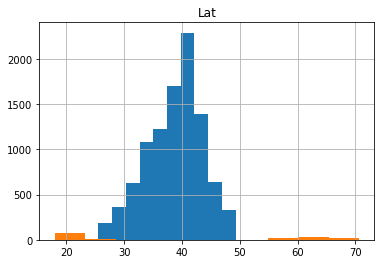

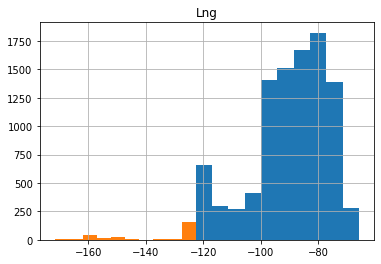

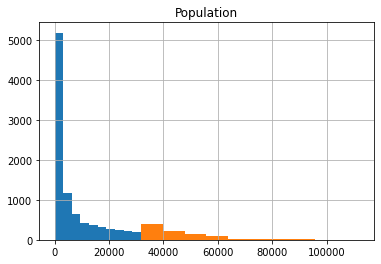

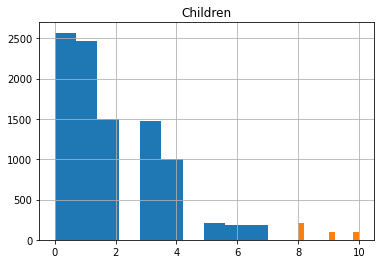

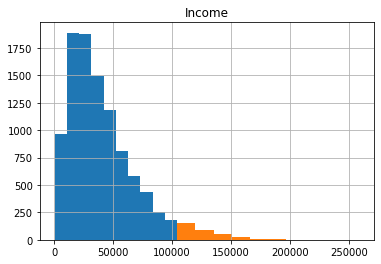

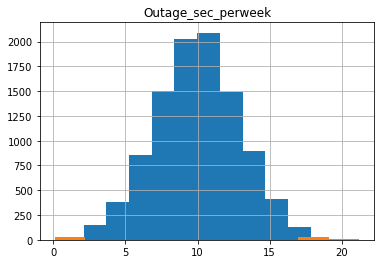

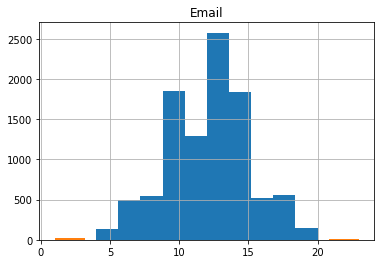

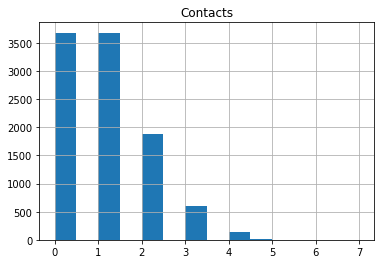

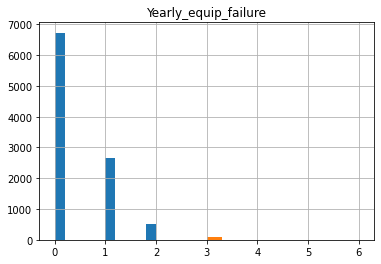

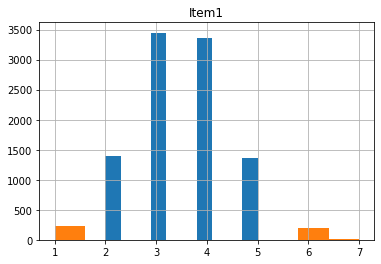

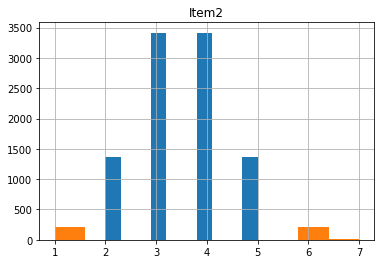

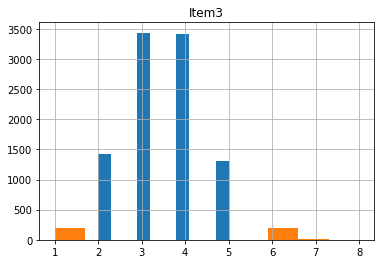

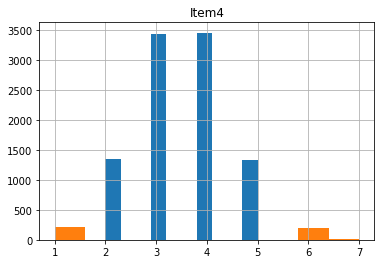

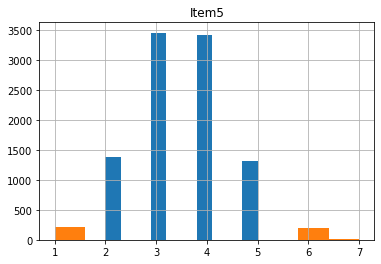

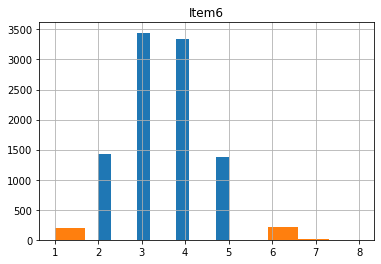

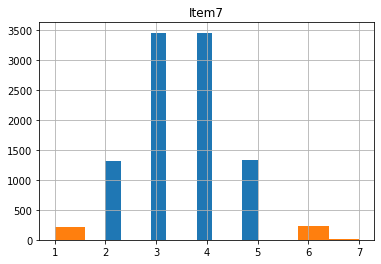

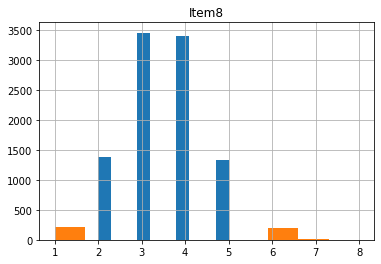

In [34]:
for col in outlier_df.columns[:21]:
    if outlier_df[f'{col}_outlier'].sum(axis=0) != 0:
        plt.subplot()
        outlier_df.loc[outlier_df[f'{col}_outlier']==0, col].hist()
        outlier_df.loc[outlier_df[f'{col}_outlier']==1, col].hist()
        plt.title(col)
        plt.show()

In [46]:
#numeric_df.head()

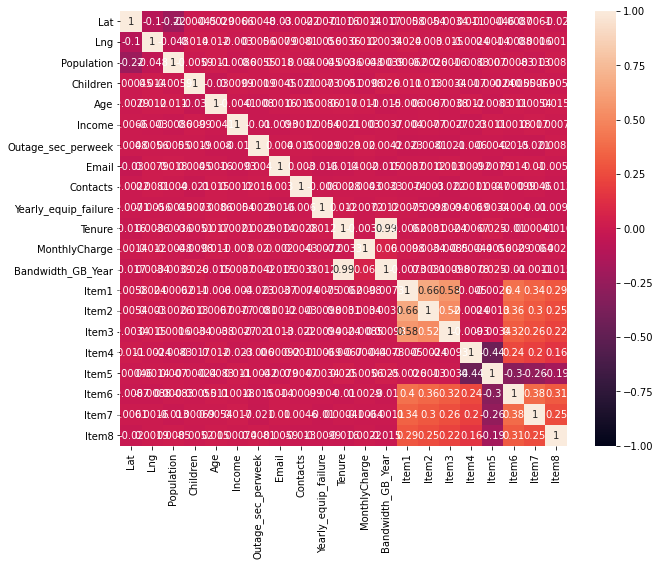

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [38]:
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2 and abs(stats.pearsonr(numeric_df[col1], numeric_df[col2])[0]) > 0.2:
            print(f'{col1} vs. {col2}: ', stats.pearsonr(numeric_df[col1], numeric_df[col2]))

Lat vs. Population:  (-0.220598060318282, 1.778200134925588e-110)
Population vs. Lat:  (-0.220598060318282, 1.778200134925588e-110)
Tenure vs. Bandwidth_GB_Year:  (0.9914951921640129, 0.0)
Bandwidth_GB_Year vs. Tenure:  (0.9914951921640129, 0.0)
Item1 vs. Item2:  (0.6630687413300227, 0.0)
Item1 vs. Item3:  (0.5780125331949684, 0.0)
Item1 vs. Item6:  (0.4028036981519133, 0.0)
Item1 vs. Item7:  (0.3367822736634492, 1.0246719102753442e-263)
Item1 vs. Item8:  (0.29272789873780514, 8.753819923988329e-197)
Item2 vs. Item1:  (0.6630687413300227, 0.0)
Item2 vs. Item3:  (0.5201942172468204, 0.0)
Item2 vs. Item6:  (0.36324700281010797, 1.351097771498133e-309)
Item2 vs. Item7:  (0.3003239041015098, 1.6140328623710415e-207)
Item2 vs. Item8:  (0.25425934518003085, 2.5172181347520645e-147)
Item3 vs. Item1:  (0.5780125331949684, 0.0)
Item3 vs. Item2:  (0.5201942172468204, 0.0)
Item3 vs. Item6:  (0.3168449990935467, 5.202795668131193e-232)
Item3 vs. Item7:  (0.26483293805885005, 4.036878210043155e-160

In [39]:
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2 and abs(stats.spearmanr(numeric_df[col1], numeric_df[col2])[0]) > 0.2:
            print(f'{col1} vs. {col2}: ', stats.spearmanr(numeric_df[col1], numeric_df[col2]))

Tenure vs. Bandwidth_GB_Year:  SpearmanrResult(correlation=0.9691556103131859, pvalue=0.0)
Bandwidth_GB_Year vs. Tenure:  SpearmanrResult(correlation=0.9691556103131859, pvalue=0.0)
Item1 vs. Item2:  SpearmanrResult(correlation=0.650164369335597, pvalue=0.0)
Item1 vs. Item3:  SpearmanrResult(correlation=0.5652647956616733, pvalue=0.0)
Item1 vs. Item6:  SpearmanrResult(correlation=0.39231715352475044, pvalue=0.0)
Item1 vs. Item7:  SpearmanrResult(correlation=0.3269552981392377, pvalue=8.654368137183868e-248)
Item1 vs. Item8:  SpearmanrResult(correlation=0.28429663851330067, pvalue=2.994499191355423e-185)
Item2 vs. Item1:  SpearmanrResult(correlation=0.650164369335597, pvalue=0.0)
Item2 vs. Item3:  SpearmanrResult(correlation=0.505997708495475, pvalue=0.0)
Item2 vs. Item6:  SpearmanrResult(correlation=0.3534879508994254, pvalue=3.684252481768583e-292)
Item2 vs. Item7:  SpearmanrResult(correlation=0.2892244440012851, pvalue=6.071235788522779e-192)
Item2 vs. Item8:  SpearmanrResult(correla

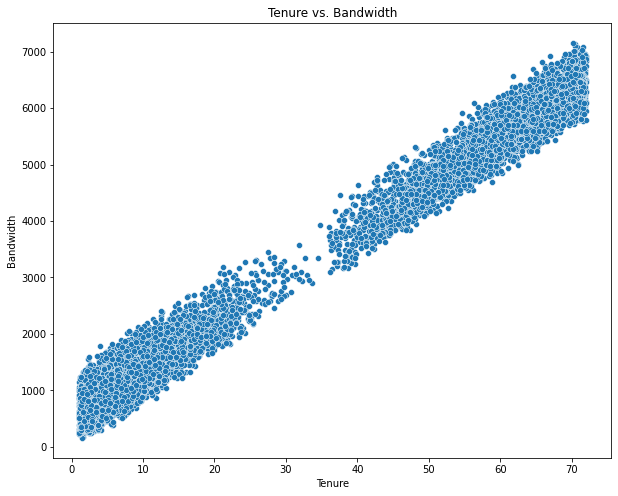

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Tenure', y='Bandwidth_GB_Year', data=numeric_df)
plt.title('Tenure vs. Bandwidth')
plt.xlabel('Tenure')
plt.ylabel('Bandwidth')
plt.show()

In [45]:
#numeric_df.columns

In [42]:
final_df = numeric_df[['Population', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']]
final_df.head()

Population  Age    Income  MonthlyCharge  Bandwidth_GB_Year
0          38   68  28561.99     172.455519         904.536110
1       10446   27  21704.77     242.632554         800.982766
2        3735   50   9609.57     159.947583        2054.706961
3       13863   48  18925.23     119.956840        2164.579412
4       11352   83  40074.19     149.948316         271.493436

In [44]:
#final_df.shape

In [50]:
scaler = StandardScaler()
final_df_scaled = scaler.fit_transform(final_df)
#print(final_df_scaled)

[[-0.67340479  0.72092524 -0.39877774 -0.00394256 -1.13848703]
 [ 0.04777153 -1.25995716 -0.64195445  1.6303259  -1.18587584]
 [-0.41723753 -0.14873045 -1.07088496 -0.29522482 -0.61213775]
 ...
 [-0.64790585 -0.24535886  0.21903654 -0.06172934  0.35098358]
 [ 1.78897441 -0.6801867  -0.82058767  1.86300465  1.40771348]
 [ 0.17138592 -1.21164295 -1.09176018  1.04467151  1.12816258]]


In [51]:
final_df_scaled = pd.DataFrame(final_df_scaled, columns=final_df.columns)
final_df_scaled.head()

Population       Age    Income  MonthlyCharge  Bandwidth_GB_Year
0   -0.673405  0.720925 -0.398778      -0.003943          -1.138487
1    0.047772 -1.259957 -0.641954       1.630326          -1.185876
2   -0.417238 -0.148730 -1.070885      -0.295225          -0.612138
3    0.284537 -0.245359 -0.740525      -1.226521          -0.561857
4    0.110549  1.445638  0.009478      -0.528086          -1.428184

In [52]:
wcss_list = []

for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(final_df_scaled)
    wcss_list.append(model.inertia_)
    
print(wcss_list)

[50000.0, 40928.54914349395, 34978.543139828944, 30614.337912926254, 27210.231806774187, 24627.030713319866, 22322.679259249195, 20750.633235789508, 19846.37566358601, 18869.11904513473]


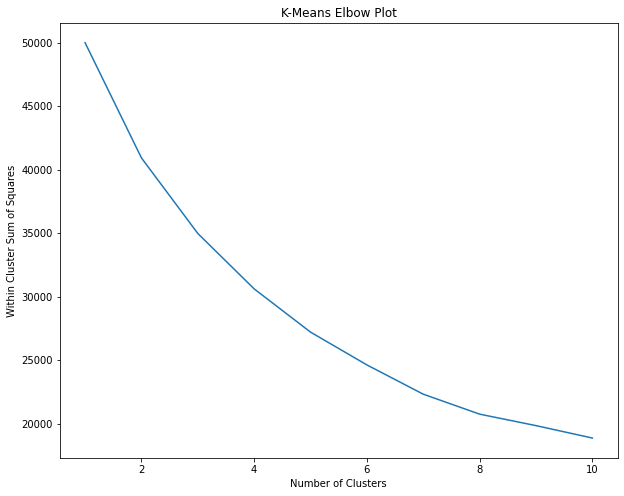

In [53]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss_list)
plt.title('K-Means Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [56]:
silo_scores = []

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(final_df_scaled)
    labels = model.predict(final_df_scaled)
    silo_scores.append(silhouette_score(final_df_scaled, labels))
print(silo_scores)

[0.20367881044918196, 0.21622119109788174, 0.21765951464658323, 0.20878806164117258, 0.20208246493391796, 0.20533208015941964, 0.21074138616070923, 0.21300075530106674, 0.20666089212747393]


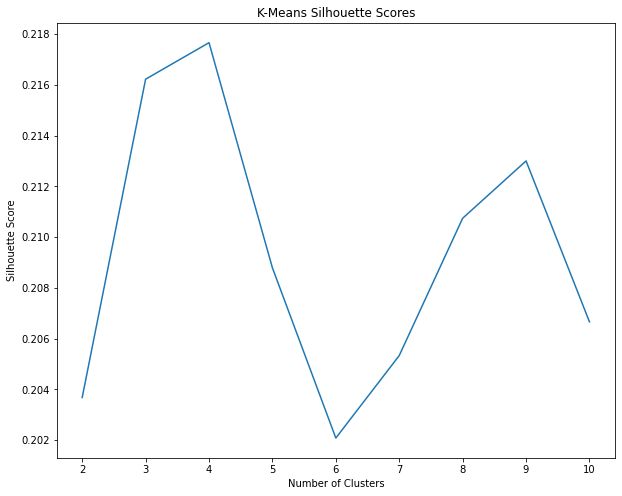

In [58]:
plt.figure(figsize=(10,8))
plt.plot(range(2,11), silo_scores)
plt.title('K-Means Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [59]:
final_model = KMeans(n_clusters=4)
final_model.fit(final_df_scaled)
final_df_scaled['cluster'] = final_model.predict(final_df_scaled)
final_df_scaled.head()

Population       Age    Income  MonthlyCharge  Bandwidth_GB_Year  cluster
0   -0.673405  0.720925 -0.398778      -0.003943          -1.138487        1
1    0.047772 -1.259957 -0.641954       1.630326          -1.185876        2
2   -0.417238 -0.148730 -1.070885      -0.295225          -0.612138        1
3    0.284537 -0.245359 -0.740525      -1.226521          -0.561857        1
4    0.110549  1.445638  0.009478      -0.528086          -1.428184        1

In [60]:
final_df_scaled.groupby('cluster').mean()

Population       Age    Income  MonthlyCharge  Bandwidth_GB_Year
cluster                                                                  
0          2.235537  0.044167 -0.061201      -0.073045          -0.032267
1         -0.320721 -0.045389  0.008701      -0.406620          -0.989897
2         -0.262361  0.050281 -0.022333       1.419080           0.186908
3         -0.323287 -0.001625  0.028578      -0.483063           0.944096

In [87]:
final_df_scaled.groupby('cluster').size()

cluster
0    1209
1    3433
2    2141
3    3217
dtype: int64

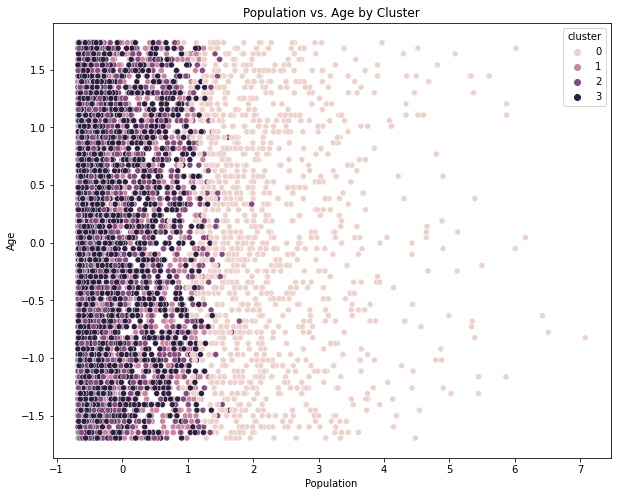

In [62]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Population', y='Age', hue='cluster', data=final_df_scaled)
plt.xlabel('Population')
plt.ylabel('Age')
plt.title('Population vs. Age by Cluster')
plt.show()

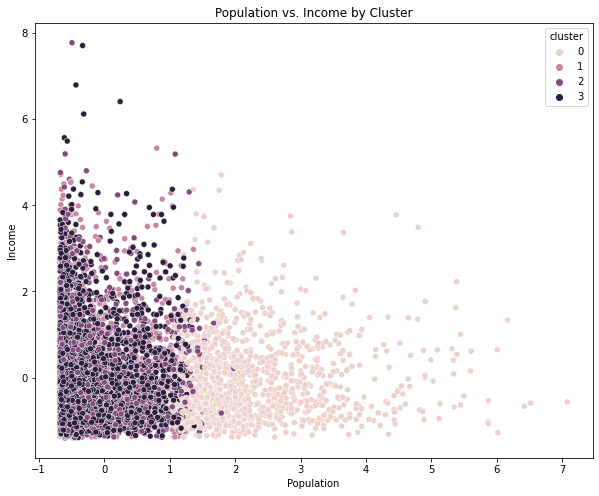

In [63]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Population', y='Income', hue='cluster', data=final_df_scaled)
plt.xlabel('Population')
plt.ylabel('Income')
plt.title('Population vs. Income by Cluster')
plt.show()

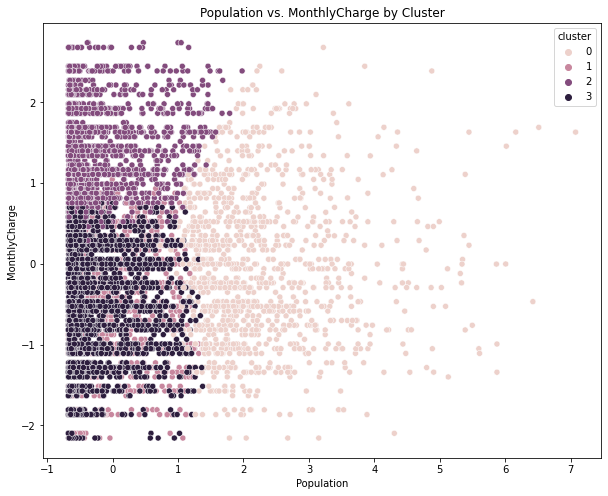

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Population', y='MonthlyCharge', hue='cluster', data=final_df_scaled)
plt.xlabel('Population')
plt.ylabel('MonthlyCharge')
plt.title('Population vs. MonthlyCharge by Cluster')
plt.show()

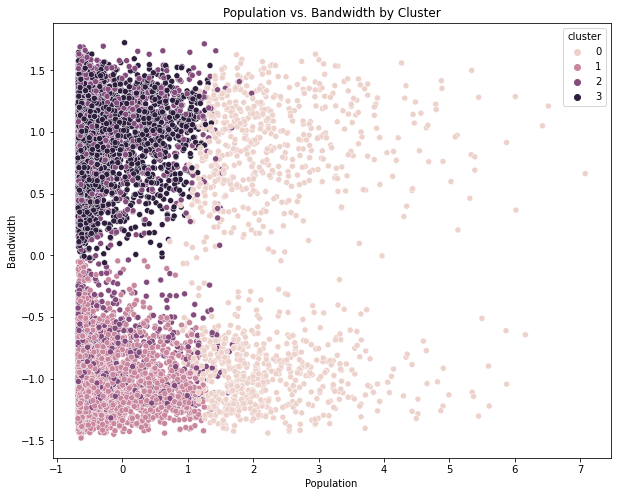

In [65]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Population', y='Bandwidth_GB_Year', hue='cluster', data=final_df_scaled)
plt.xlabel('Population')
plt.ylabel('Bandwidth')
plt.title('Population vs. Bandwidth by Cluster')
plt.show()

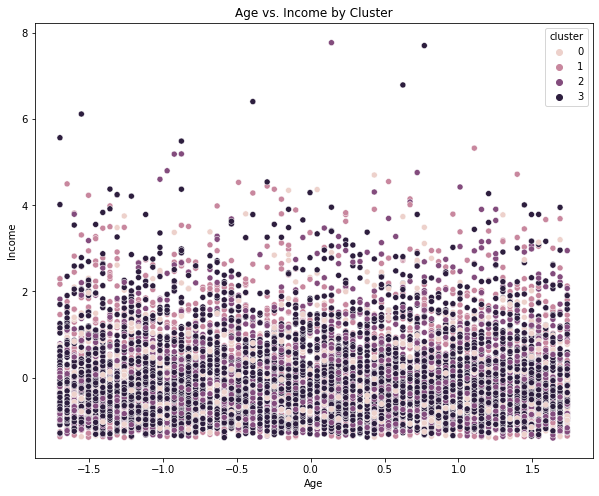

In [66]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Income', hue='cluster', data=final_df_scaled)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income by Cluster')
plt.show()

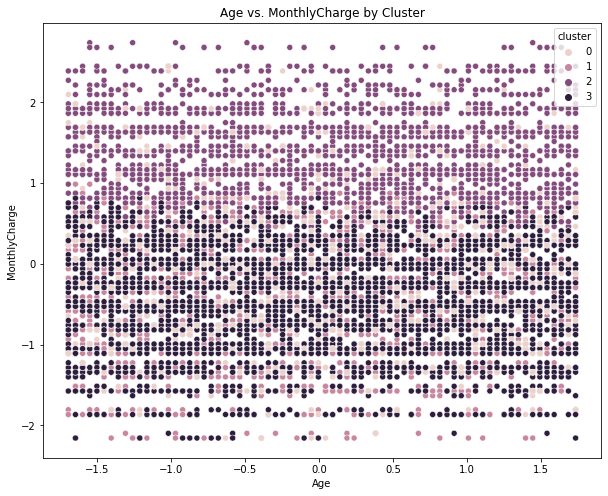

In [67]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='MonthlyCharge', hue='cluster', data=final_df_scaled)
plt.xlabel('Age')
plt.ylabel('MonthlyCharge')
plt.title('Age vs. MonthlyCharge by Cluster')
plt.show()

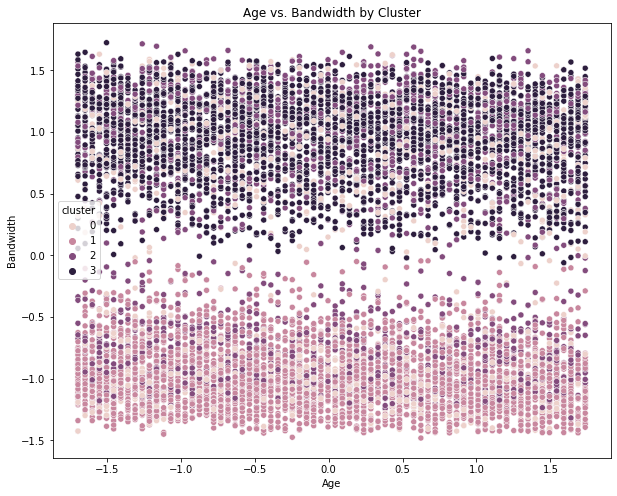

In [68]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Bandwidth_GB_Year', hue='cluster', data=final_df_scaled)
plt.xlabel('Age')
plt.ylabel('Bandwidth')
plt.title('Age vs. Bandwidth by Cluster')
plt.show()

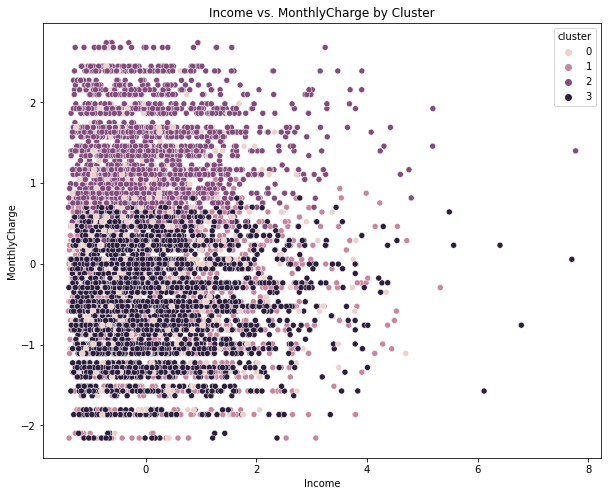

In [69]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income', y='MonthlyCharge', hue='cluster', data=final_df_scaled)
plt.xlabel('Income')
plt.ylabel('MonthlyCharge')
plt.title('Income vs. MonthlyCharge by Cluster')
plt.show()

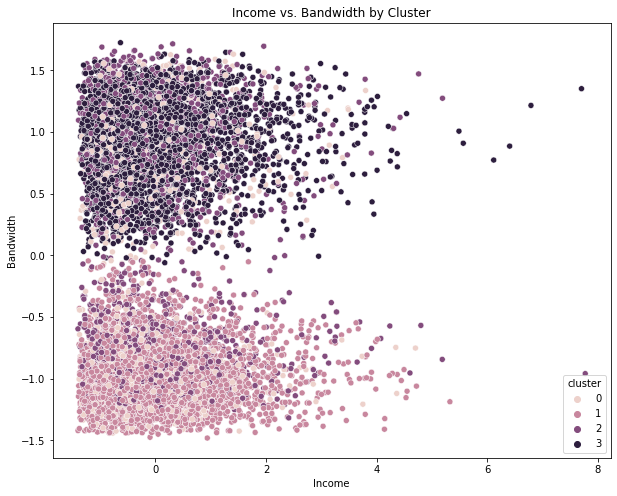

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income', y='Bandwidth_GB_Year', hue='cluster', data=final_df_scaled)
plt.xlabel('Income')
plt.ylabel('Bandwidth')
plt.title('Income vs. Bandwidth by Cluster')
plt.show()

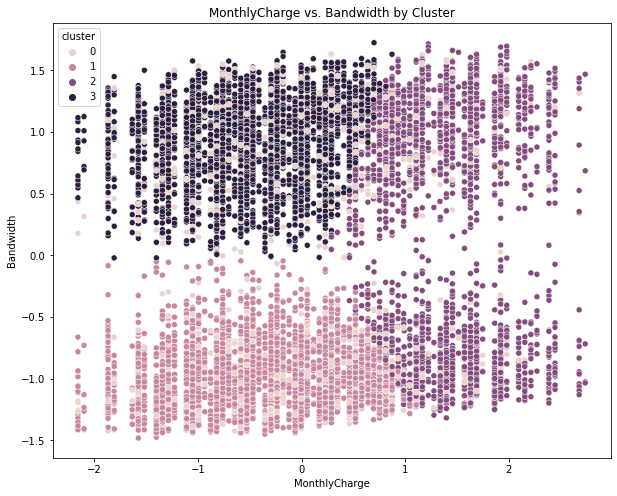

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='MonthlyCharge', y='Bandwidth_GB_Year', hue='cluster', data=final_df_scaled)
plt.xlabel('MonthlyCharge')
plt.ylabel('Bandwidth')
plt.title('MonthlyCharge vs. Bandwidth by Cluster')
plt.show()

In [72]:
avg_df = final_df_scaled.groupby('cluster').mean()

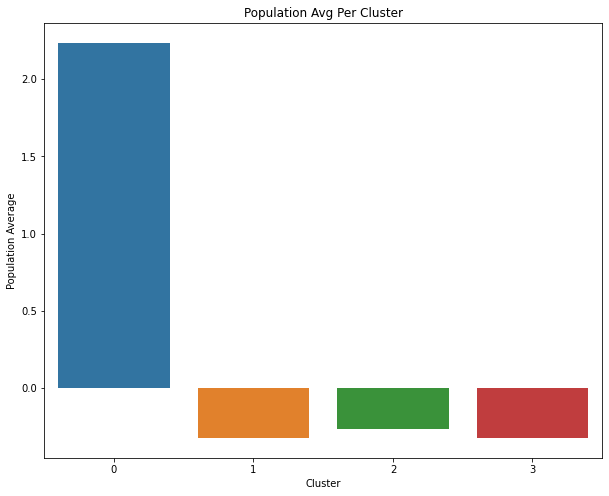

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x=avg_df.index, y=avg_df['Population'])
plt.xlabel('Cluster')
plt.ylabel('Population Average')
plt.title('Population Avg Per Cluster')
plt.show()

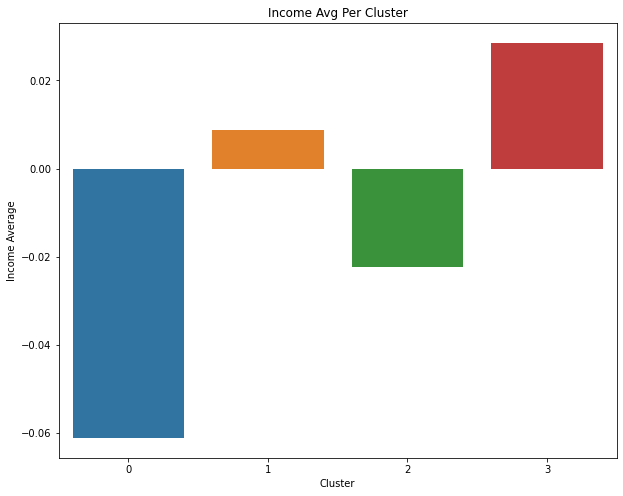

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x=avg_df.index, y=avg_df['Income'])
plt.xlabel('Cluster')
plt.ylabel('Income Average')
plt.title('Income Avg Per Cluster')
plt.show()

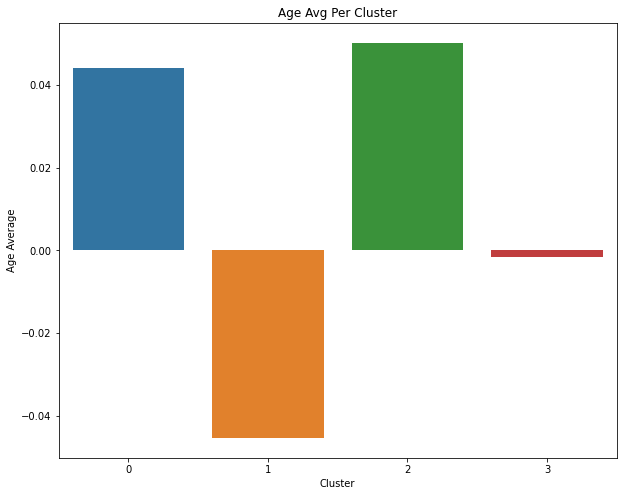

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(x=avg_df.index, y=avg_df['Age'])
plt.xlabel('Cluster')
plt.ylabel('Age Average')
plt.title('Age Avg Per Cluster')
plt.show()

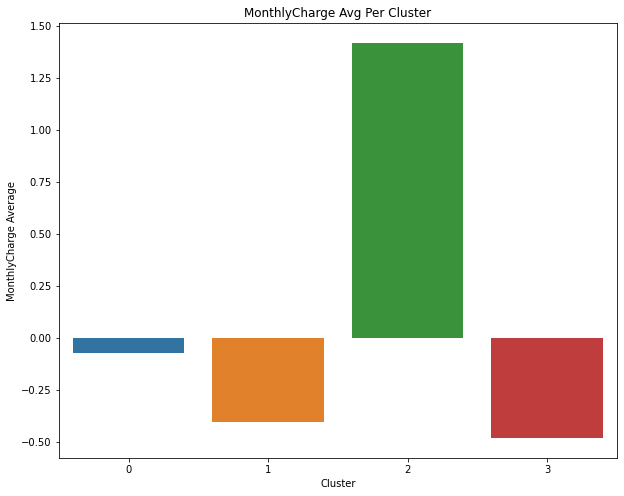

In [76]:
plt.figure(figsize=(10,8))
sns.barplot(x=avg_df.index, y=avg_df['MonthlyCharge'])
plt.xlabel('Cluster')
plt.ylabel('MonthlyCharge Average')
plt.title('MonthlyCharge Avg Per Cluster')
plt.show()

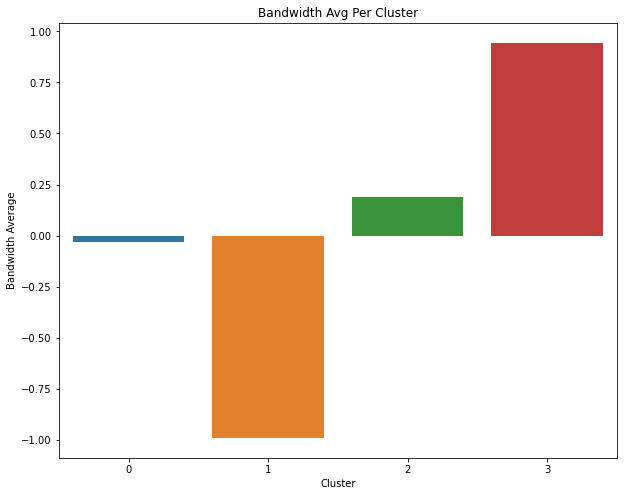

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(x=avg_df.index, y=avg_df['Bandwidth_GB_Year'])
plt.xlabel('Cluster')
plt.ylabel('Bandwidth Average')
plt.title('Bandwidth Avg Per Cluster')
plt.show()

In [79]:
#df.head()

In [80]:
df['cluster'] = final_df_scaled['cluster']

In [82]:
#df.head()

In [122]:
#df.columns

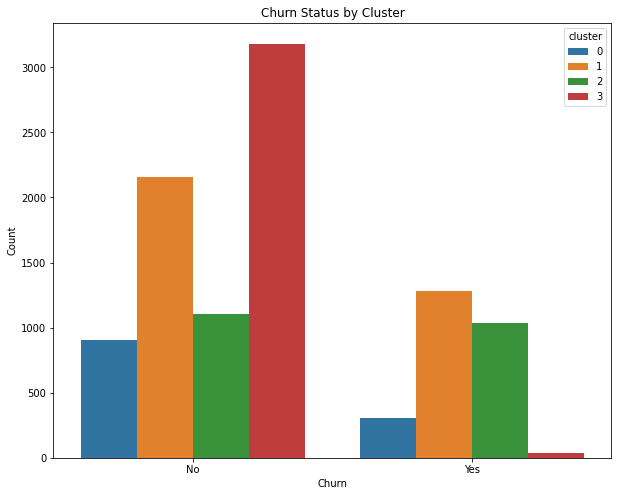

In [86]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='cluster', data=df)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Status by Cluster')
plt.show()

In [88]:
#df.groupby('cluster').size()

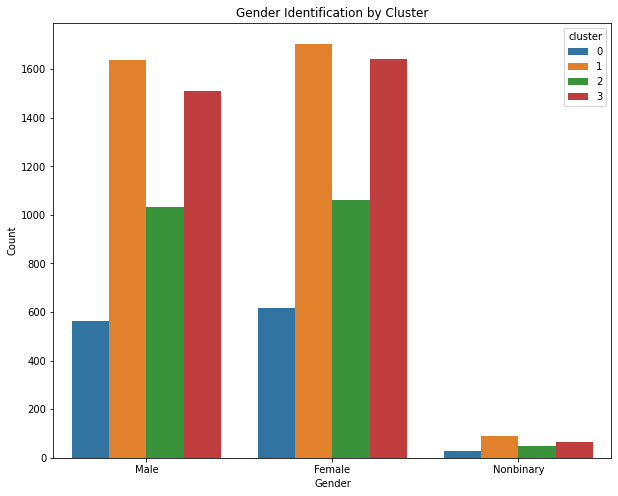

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(x='Gender', hue='cluster', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Identification by Cluster')
plt.show()

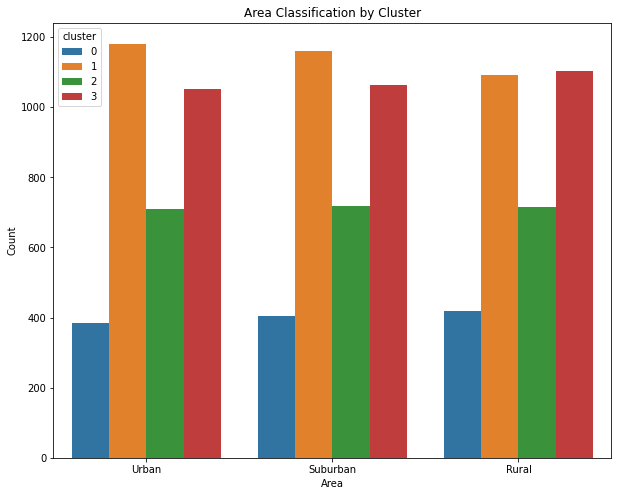

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(x='Area', hue='cluster', data=df)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Area Classification by Cluster')
plt.show()

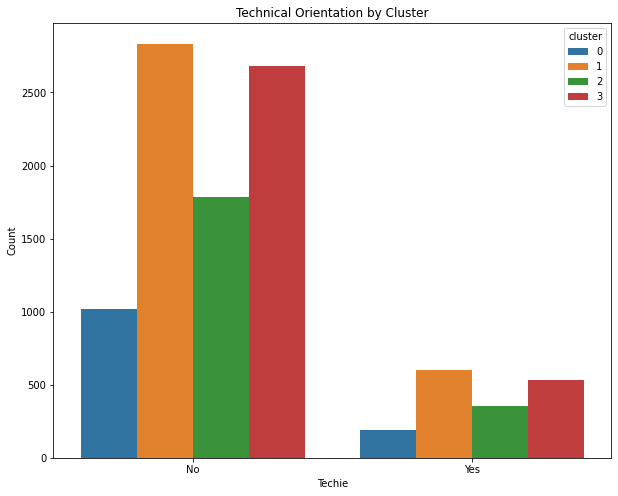

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(x='Techie', hue='cluster', data=df)
plt.xlabel('Techie')
plt.ylabel('Count')
plt.title('Technical Orientation by Cluster')
plt.show()

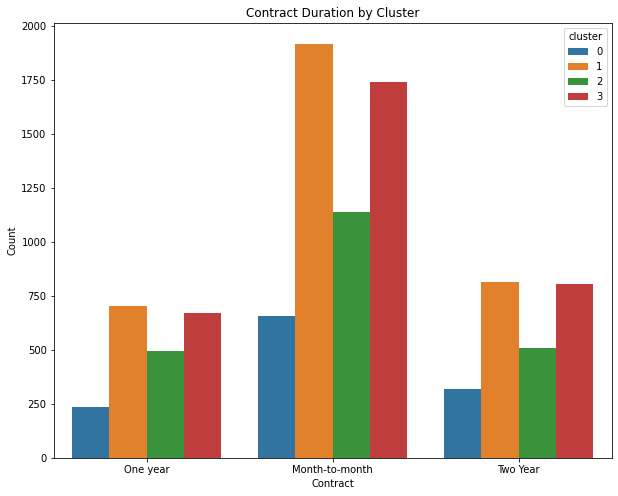

In [92]:
plt.figure(figsize=(10,8))
sns.countplot(x='Contract', hue='cluster', data=df)
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Contract Duration by Cluster')
plt.show()

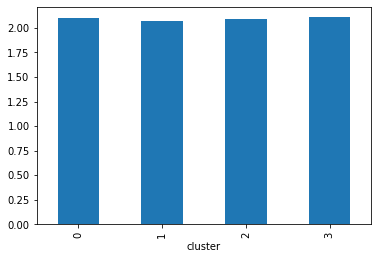

In [93]:
df.groupby('cluster')['Children'].mean().plot(kind='bar')
plt.show()

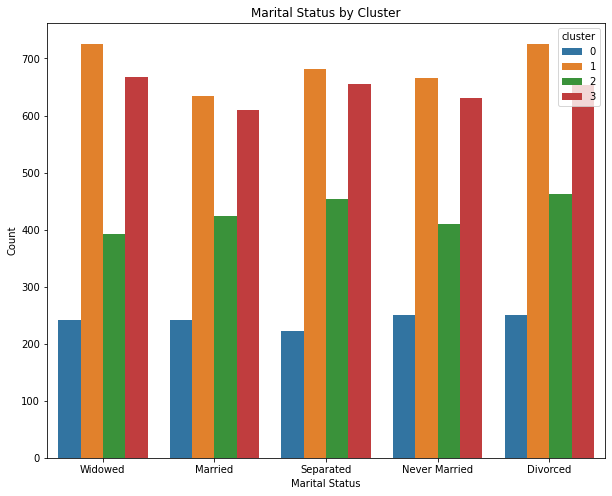

In [94]:
plt.figure(figsize=(10,8))
sns.countplot(x='Marital', hue='cluster', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status by Cluster')
plt.show()

In [123]:
#df.columns

In [124]:
#df['Outage_sec_perweek'].describe()

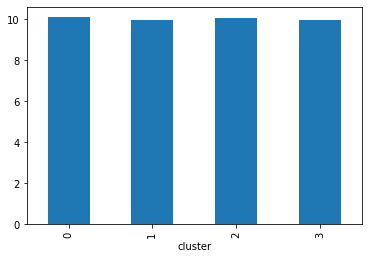

In [97]:
df.groupby('cluster')['Outage_sec_perweek'].mean().plot(kind='bar')
plt.show()

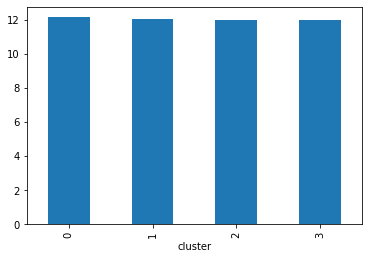

In [98]:
df.groupby('cluster')['Email'].mean().plot(kind='bar')
plt.show()

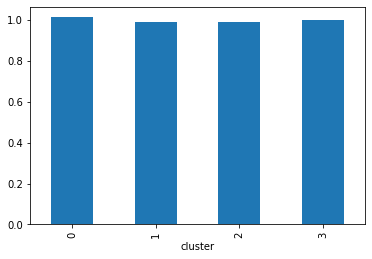

In [99]:
df.groupby('cluster')['Contacts'].mean().plot(kind='bar')
plt.show()

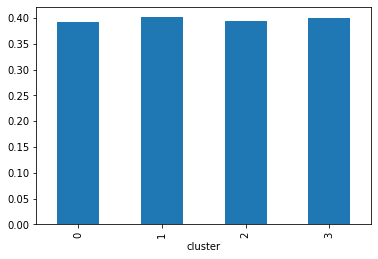

In [100]:
df.groupby('cluster')['Yearly_equip_failure'].mean().plot(kind='bar')
plt.show()

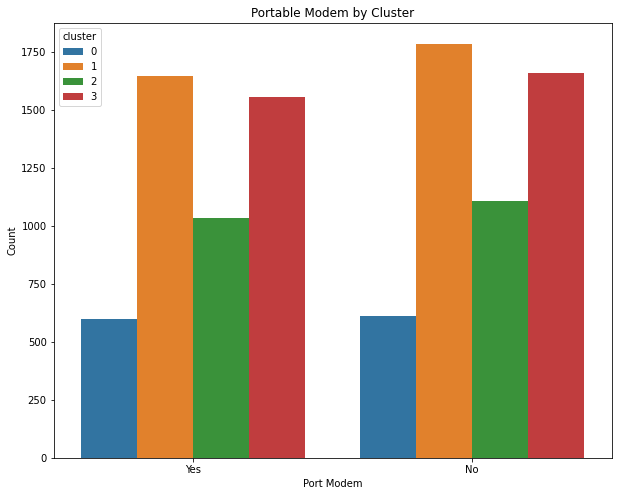

In [101]:
plt.figure(figsize=(10,8))
sns.countplot(x='Port_modem', hue='cluster', data=df)
plt.xlabel('Port Modem')
plt.ylabel('Count')
plt.title('Portable Modem by Cluster')
plt.show()

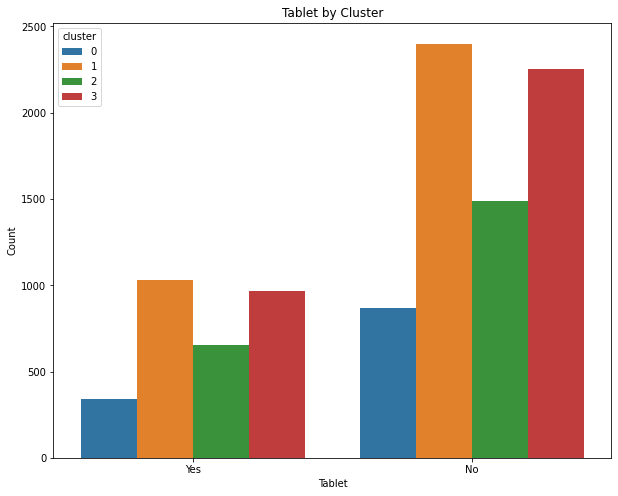

In [102]:
plt.figure(figsize=(10,8))
sns.countplot(x='Tablet', hue='cluster', data=df)
plt.xlabel('Tablet')
plt.ylabel('Count')
plt.title('Tablet by Cluster')
plt.show()

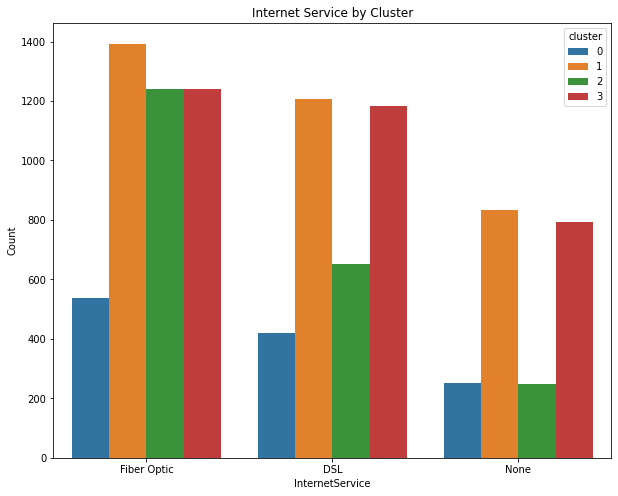

In [104]:
plt.figure(figsize=(10,8))
sns.countplot(x='InternetService', hue='cluster', data=df)
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Internet Service by Cluster')
plt.show()

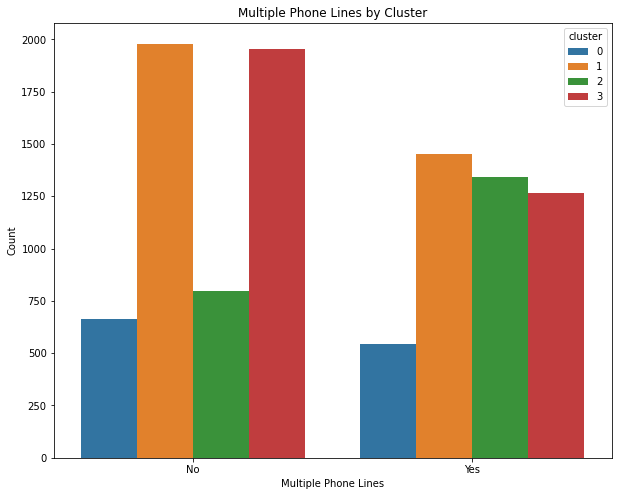

In [105]:
plt.figure(figsize=(10,8))
sns.countplot(x='Multiple', hue='cluster', data=df)
plt.xlabel('Multiple Phone Lines')
plt.ylabel('Count')
plt.title('Multiple Phone Lines by Cluster')
plt.show()

In [106]:
#df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8', 'cluster'],
      dtype='object')

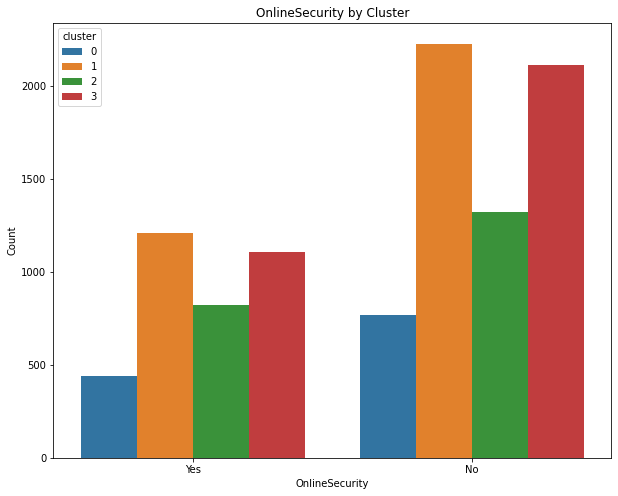

In [107]:
plt.figure(figsize=(10,8))
sns.countplot(x='OnlineSecurity', hue='cluster', data=df)
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.title('OnlineSecurity by Cluster')
plt.show()

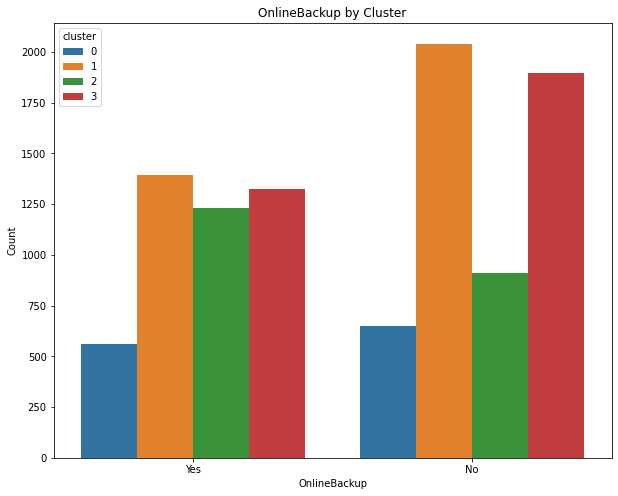

In [108]:
plt.figure(figsize=(10,8))
sns.countplot(x='OnlineBackup', hue='cluster', data=df)
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.title('OnlineBackup by Cluster')
plt.show()

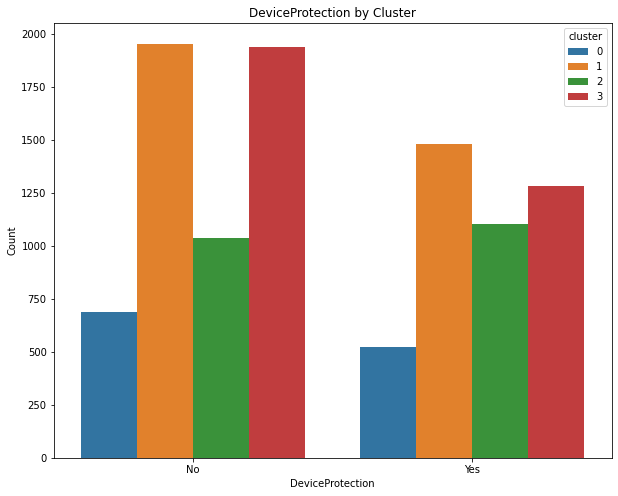

In [109]:
plt.figure(figsize=(10,8))
sns.countplot(x='DeviceProtection', hue='cluster', data=df)
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.title('DeviceProtection by Cluster')
plt.show()

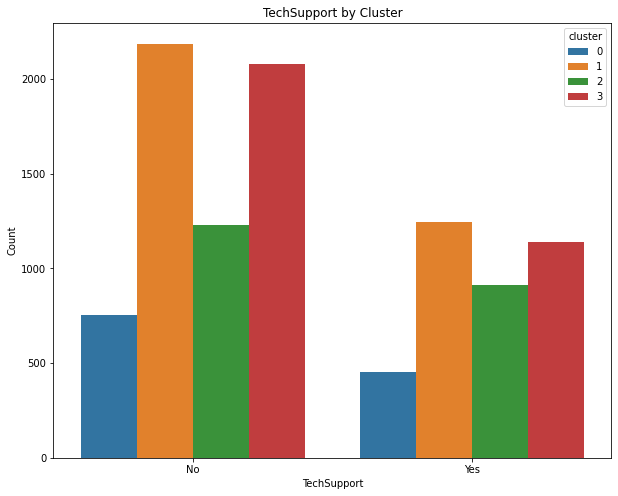

In [110]:
plt.figure(figsize=(10,8))
sns.countplot(x='TechSupport', hue='cluster', data=df)
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.title('TechSupport by Cluster')
plt.show()

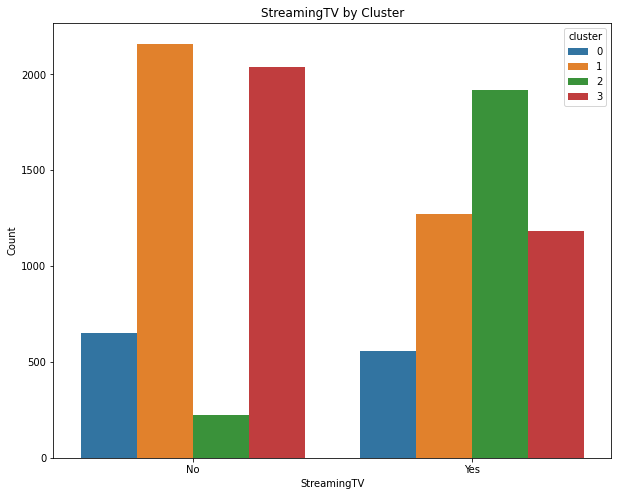

In [111]:
plt.figure(figsize=(10,8))
sns.countplot(x='StreamingTV', hue='cluster', data=df)
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.title('StreamingTV by Cluster')
plt.show()

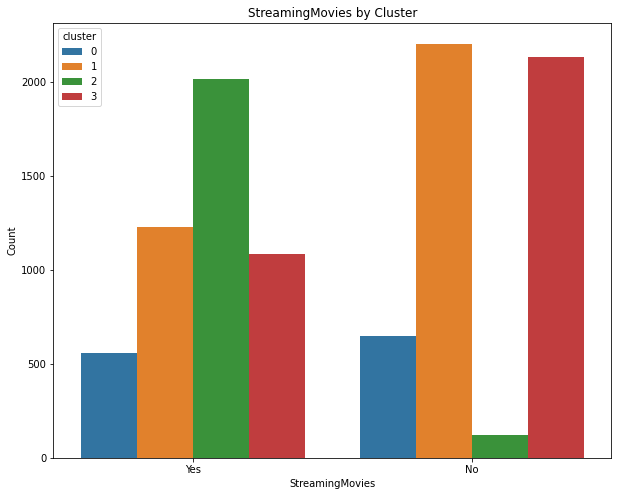

In [112]:
plt.figure(figsize=(10,8))
sns.countplot(x='StreamingMovies', hue='cluster', data=df)
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.title('StreamingMovies by Cluster')
plt.show()

In [114]:
interesting_cols = ['StreamingMovies', 'StreamingTV', 'Multiple', 'InternetService']

In [118]:
df.groupby(['cluster', 'StreamingMovies'])['Customer_id'].count() / df.groupby('cluster')['Customer_id'].count()

cluster  StreamingMovies
0        No                 0.536807
         Yes                0.463193
1        No                 0.642295
         Yes                0.357705
2        No                 0.056983
         Yes                0.943017
3        No                 0.663351
         Yes                0.336649
Name: Customer_id, dtype: float64

In [119]:
df.groupby(['cluster', 'StreamingTV'])['Customer_id'].count() / df.groupby('cluster')['Customer_id'].count()

cluster  StreamingTV
0        No             0.538462
         Yes            0.461538
1        No             0.629187
         Yes            0.370813
2        No             0.104624
         Yes            0.895376
3        No             0.632888
         Yes            0.367112
Name: Customer_id, dtype: float64

In [120]:
df.groupby(['cluster', 'Multiple'])['Customer_id'].count() / df.groupby('cluster')['Customer_id'].count()

cluster  Multiple
0        No          0.548387
         Yes         0.451613
1        No          0.576464
         Yes         0.423536
2        No          0.372256
         Yes         0.627744
3        No          0.607087
         Yes         0.392913
Name: Customer_id, dtype: float64

In [121]:
df.groupby(['cluster', 'InternetService'])['Customer_id'].count() / df.groupby('cluster')['Customer_id'].count()

cluster  InternetService
0        DSL                0.347395
         Fiber Optic        0.443342
         None               0.209264
1        DSL                0.351588
         Fiber Optic        0.405768
         None               0.242645
2        DSL                0.304531
         Fiber Optic        0.579169
         None               0.116301
3        DSL                0.368045
         Fiber Optic        0.385141
         None               0.246814
Name: Customer_id, dtype: float64